**Author**: CodeForAll  
**License**: MIT License

---


## What is an Impulse?

In control systems and signal processing, an **impulse** is a type of input that is characterized by a sudden and brief application of force or energy. In the context of our **mass-spring-damper system**, an impulse refers to a force that is applied instantaneously at a single point in time, often modeled as a Dirac delta function.

Mathematically, an impulse input is represented as:

$$
F(t) = \delta(t)
$$

Where:
- \( delta(t) \) is the Dirac delta function, which is zero everywhere except at \( t = 0 \), where it has an infinitely large spike.
  
This type of input is idealized and doesn't occur in real-world physical systems, but it is a useful concept in analyzing how systems respond to sudden disturbances or shocks.

## Why Impulse Response?

The impulse response of a system is particularly useful because it is related to the system's **transfer function**. In fact, if you take the **inverse Laplace transform** of the transfer function, you obtain the system's impulse response in the time domain. 

Impulse response analysis helps in understanding:
- How fast the system reacts to sudden inputs.
- Whether the system oscillates or settles when subjected to an instantaneous force.
- The system's natural frequency and damping properties.

By simulating the impulse response, we can get a quick assessment of the system's dynamic behavior and identify key features such as overshoot, settling time, and stability.



# Mass-Spring-Damper System: Impulse Response Analysis

In this experiment, we will analyze the **impulse response** of a mass-spring-damper system. The impulse response shows how the system reacts when an instantaneous force is applied (an impulse input). This type of analysis helps in understanding how the system responds to sudden changes and is crucial for analyzing system stability.

---

## System Overview

The mass-spring-damper system is governed by the following second-order differential equation:

$$
F(t) = m \cdot \ddot{x}(t) + c \cdot \dot{x}(t) + k \cdot x(t)
$$

Where:
- \( F(t) \) is the applied force (in Newtons, N),
- \( m \) is the mass of the object (in kg),
- \( c \) is the damping coefficient (in Ns/m),
- \( k \) is the spring constant (in N/m),
- \( x(t) \) is the displacement of the mass from its equilibrium position (in meters).

---

## Transfer Function

We will use the transfer function \( G(s) \) to model the system's behavior. The transfer function in the Laplace domain is given by:

$$
G(s) = \frac{X(s)}{F(s)} = \frac{1}{m \cdot s^2 + c \cdot s + k}
$$

Where:
- \( X(s) \) is the Laplace transform of the displacement \( x(t) \),
- \( F(s) \) is the Laplace transform of the impulse input \( F(t) \).

---

## Damping Scenarios

We will analyze the impulse response for three damping scenarios:
1. **Underdamped (c = 0.5 Ns/m)**: The system oscillates after the impulse force.
2. **Critically Damped (c = 1.0 Ns/m)**: The system responds without oscillations and returns to equilibrium quickly.
3. **Overdamped (c = 3.0 Ns/m)**: The system responds slowly without oscillations.

---

## Experiment Setup

We will use the following parameters for the system:
- Mass, \( m = 1 kg \),
- Spring constant, \( k = 2 N/m \),
- Time vector from 0 to 10 seconds, with 500 points.

We will simulate and plot the impulse response for each damping scenario to observe how the system behaves in response to an impulse force.


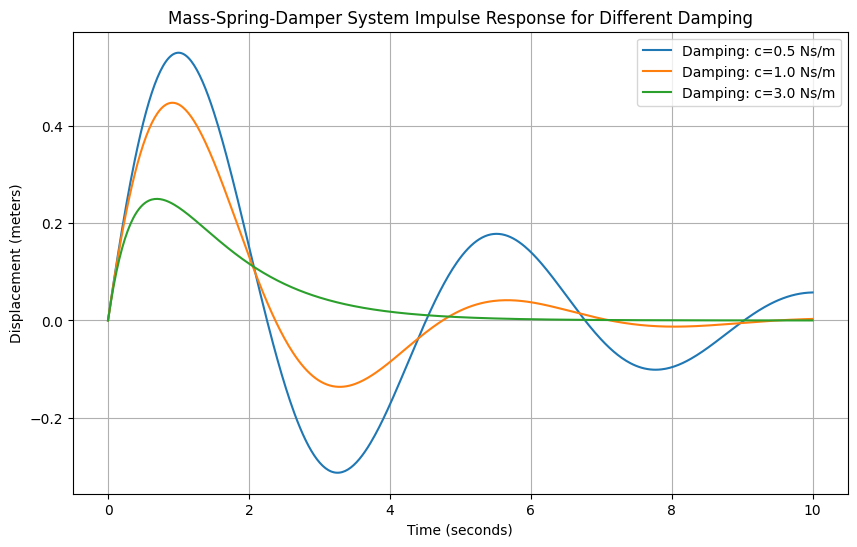

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# System parameters
m = 1  # mass (kg)
k = 2  # spring constant (N/m)

# Different damping coefficients for different system behaviors
damping_values = [0.5, 1.0, 3.0]  # Underdamped, Critically Damped, Overdamped

# Time vector (from 0 to 10 seconds, 500 points)
time = np.linspace(0, 10, 500)

# Plotting the impulse response for different damping values
plt.figure(figsize=(10, 6))

# Loop through each damping coefficient
for c in damping_values:
    # Create transfer function for each damping value
    system = ctrl.TransferFunction([1], [m, c, k])
    
    # Simulate impulse response
    time_response, response = ctrl.impulse_response(system, T=time)
    
    # Plot the response
    plt.plot(time_response, response, label=f'Damping: c={c} Ns/m')

# Plotting the time-domain response
plt.title('Mass-Spring-Damper System Impulse Response for Different Damping')
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement (meters)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Observations

The system's response to an impulse input depends heavily on the damping coefficient:

- **Underdamped (c = 0.5)**: The system oscillates after the impulse, with decaying oscillations.
  
- **Critically Damped (c = 1.0)**: The system responds without oscillations and settles quickly at the equilibrium position.
  
- **Overdamped (c = 3.0)**: The system reacts slowly and steadily without oscillations, taking longer to reach equilibrium.

In an impulse response, the system’s ability to dampen oscillations and settle is crucial in understanding how it handles sudden disturbances or shocks.

---

## Conclusion

The impulse response analysis provides insight into the natural behavior of the system in response to sudden forces. By varying the damping coefficient \( c \), we can see how the system's response transitions from oscillatory (underdamped) to quickly settling (critically damped) and then to a slower response without oscillation (overdamped).

This analysis helps in designing control systems that can effectively manage sudden changes, especially in applications like automotive suspensions, robotics, and aerospace systems.
